# 1. Descripcion del proyecto

Trabajas en la compañía de extracción de petróleo OilyGiant. Tu tarea es encontrar los mejores lugares donde abrir 200 pozos nuevos de petróleo.

Para completar esta tarea, tendrás que realizar los siguientes pasos:

1. Leer los archivos con los parámetros recogidos de pozos petrolíferos en la región seleccionada: calidad de crudo y volumen de reservas.
2. Crear un modelo para predecir el volumen de reservas en pozos nuevos.
3. Elegir los pozos petrolíferos que tienen los valores estimados más altos.
4. Elegir la región con el beneficio total más alto para los pozos petrolíferos seleccionados.

Tienes datos sobre muestras de crudo de tres regiones. Ya se conocen los parámetros de cada pozo petrolero de la región. Crea un modelo que ayude a elegir la región con el mayor margen de beneficio. Analiza los beneficios y riesgos potenciales utilizando la técnica bootstrapping.

Condiciones:
1. Solo se debe usar la regresión lineal para el entrenamiento del modelo.
2. Al explorar la región, se lleva a cabo un estudio de 500 puntos con la selección de los mejores 200 puntos para el cálculo del beneficio.
3. El presupuesto para el desarrollo de 200 pozos petroleros es de 100 millones de dólares.
4. Un barril de materias primas genera 4.5 USD de ingresos. El ingreso de una unidad de producto es de 4500 dólares (el volumen de reservas está expresado en miles de barriles).
5. Después de la evaluación de riesgo, mantén solo las regiones con riesgo de pérdidas inferior al 2.5%. De las que se ajustan a los criterios, se debe seleccionar la región con el beneficio promedio más alto.

# 2. Descarga y preparacion de datos

Se cargaran las librerias a usar en este proyecto, se exploraran los datos y se ajustara lo que sea necesario ajustar dentro de cada dataset individual o bien en el master. Se hara un dataset unico para poder usarlo y optimizar el codigo. 

In [50]:
# Importacion de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [51]:
# Cargado de dataset region 0, 1 y 2
R0 = pd.read_csv('/datasets/geo_data_0.csv')
R1 = pd.read_csv('/datasets/geo_data_1.csv')
R2 = pd.read_csv('/datasets/geo_data_2.csv')

**1.1 Region 0**

In [52]:
print(R0.shape)
print()
R0.describe(include='all')

(100000, 5)



,id,f0,f1,f2,product
count,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,99990,NaN,NaN,NaN,NaN
top,AGS9W,NaN,NaN,NaN,NaN
freq,2,NaN,NaN,NaN,NaN
mean,NaN,0.500419,0.250143,2.502647,92.500000
std,NaN,0.871832,0.504433,3.248248,44.288691
min,NaN,-1.408605,-0.848218,-12.088328,0.000000
25%,NaN,-0.072580,-0.200881,0.287748,56.497507
50%,NaN,0.502360,0.250252,2.515969,91.849972
75%,NaN,1.073581,0.700646,4.715088,128.564089


In [53]:
R0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [54]:
R0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


**1.2 Region 1**

In [55]:
print(R1.shape)
print()

R1.describe(include='all')

(100000, 5)



,id,f0,f1,f2,product
count,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,99996,NaN,NaN,NaN,NaN
top,wt4Uk,NaN,NaN,NaN,NaN
freq,2,NaN,NaN,NaN,NaN
mean,NaN,1.141296,-4.796579,2.494541,68.825000
std,NaN,8.965932,5.119872,1.703572,45.944423
min,NaN,-31.609576,-26.358598,-0.018144,0.000000
25%,NaN,-6.298551,-8.267985,1.000021,26.953261
50%,NaN,1.153055,-4.813172,2.011479,57.085625
75%,NaN,8.621015,-1.332816,3.999904,107.813044


In [56]:
R1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [57]:
R1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


**1.3 Region 2**

In [58]:
print(R2.shape)
print()
R2.describe(include='all')

(100000, 5)



,id,f0,f1,f2,product
count,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,99996,NaN,NaN,NaN,NaN
top,VF7Jo,NaN,NaN,NaN,NaN
freq,2,NaN,NaN,NaN,NaN
mean,NaN,0.002023,-0.002081,2.495128,95.000000
std,NaN,1.732045,1.730417,3.473445,44.749921
min,NaN,-8.760004,-7.084020,-11.970335,0.000000
25%,NaN,-1.162288,-1.174820,0.130359,59.450441
50%,NaN,0.009424,-0.009482,2.484236,94.925613
75%,NaN,1.158535,1.163678,4.858794,130.595027


In [59]:
R2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [60]:
R2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


**1.4 Generacion de dataset unico**

In [61]:
R0['region'] = 'R0'
R1['region'] = 'R1'
R2['region'] = 'R2'
regions = pd.concat([R0,R1,R2],ignore_index=True)
print(regions.sample(20))
print()
print(regions.info())

           id         f0         f1        f2     product region
67436   k6whw  -0.778636   0.442105 -0.020347   33.406495     R0
199576  jZrX7   5.581783 -13.705263  5.012680  134.766305     R1
284729  V3fJ4  -2.960721  -0.648867  7.537913  124.867450     R2
165827  KXHJD   1.451232  -7.623219  2.005199   53.906522     R1
173474  wmAE9  -4.922619  -6.418496  2.989864   84.038886     R1
116830  O71PU  -2.127104  -1.248864  2.001948   57.085625     R1
117001  719FF  -5.858962  -1.993811  1.001323   30.132364     R1
145725  lbuVR  -7.978881   0.705343  2.005945   57.085625     R1
213869  jsuAI   0.744827   2.963465  3.794316  114.863521     R2
163244  k3SQV  -2.896870  -7.569207  0.011276    3.179103     R1
179059  BpB6C  10.151863  -6.659597  0.007955    0.000000     R1
74870   T1Iwh   0.315875  -0.231396 -0.711703   39.930867     R0
299743  QWrs7   1.781940   0.158773  1.131750  100.677731     R2
10184   I8CPc   0.692052  -0.539077  0.691291   62.220592     R0
7983    sIQcv  -0.811232 

# 3. Entrenamiento y prueba de modelo

En esta seccion se generara una funcion para el modelo de regresion linear, asi como evitar repetir codigo y facilitar la obtencion de las metricas y resultados para cada region. 
Dentro de la funcion se realizara lo siguiente:
1. Division del conjunto de entrenamiento y de validacion en proporcion de 75% / 25%
2. Entrenamiento y prediccion con el modelo de regresion linear
3. Almacenamiento de predicciones y respuestas correctas en una variable
4. Obtencion de metricas, tales como MAE, MSE, RMSE y R2

In [62]:
#Funcion para el modelo de regresion linear
def model_lr(data):
    # Creacion de features y target 
    features = data.drop(columns=['id','product','region'])
    target = data['product']

    # Se divide el dataset con 75% train y 25% validacion
    features_train, features_valid, target_train, target_valid = train_test_split(features,target,test_size=0.25,random_state=12345)

    # Escalacion de variables numericas
    scaler = StandardScaler()
    scaler.fit(features_train)
    features_train_scaled = scaler.transform(features_train)
    features_valid_scaled = scaler.transform(features_valid)

    # Entrenamiento y validacion de modelo de regresion linear
    model = LinearRegression()
    model.fit(features_train_scaled,target_train)
    pred_target = model.predict(features_valid_scaled)

    predictions = pd.DataFrame({'target_valid':target_valid,'pred_target':pred_target})

    # Evaluacion de modelo
    train_score = model.score(features_train_scaled,target_train)
    valid_score = model.score(features_valid_scaled,target_valid)

    # Metricas del modelo
    MAE = mean_absolute_error(target_valid,pred_target)
    MSE = mean_squared_error(target_valid,pred_target)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(target_valid,pred_target)

    metrics = pd.DataFrame({'Train score':[train_score],'Validation score':[valid_score],'MAE':[MAE],'MSE':[MSE],'RMSE':[RMSE],'R2':[R2]})

    print(f'Train score:{train_score}')
    print(f'Validation score:{valid_score}')
    print(f'MAE:{MAE}')
    print(f'MSE:{MSE}')
    print(f'RMSE:{RMSE}')
    print(f'R2:{R2}')

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(target_valid, pred_target)
    ax.plot([target_valid.min(), target_valid.max()], [target_valid.min(), target_valid.max()], 'k--', lw=2)
    ax.set_xlabel('Valores reales')
    ax.set_ylabel('Predicciones')
    ax.set_title('Valores reales vs. predicciones')
    plt.show()

    return metrics,predictions,model

**3.1 Region 0, Region 1 and Region 2 results** 

- Region: R0
Train score:0.27423906493940775
Validation score:0.27994321524487786
MAE:30.919600777151313
MSE:1412.2129364399243
RMSE:37.5794217150813
R2:0.27994321524487786


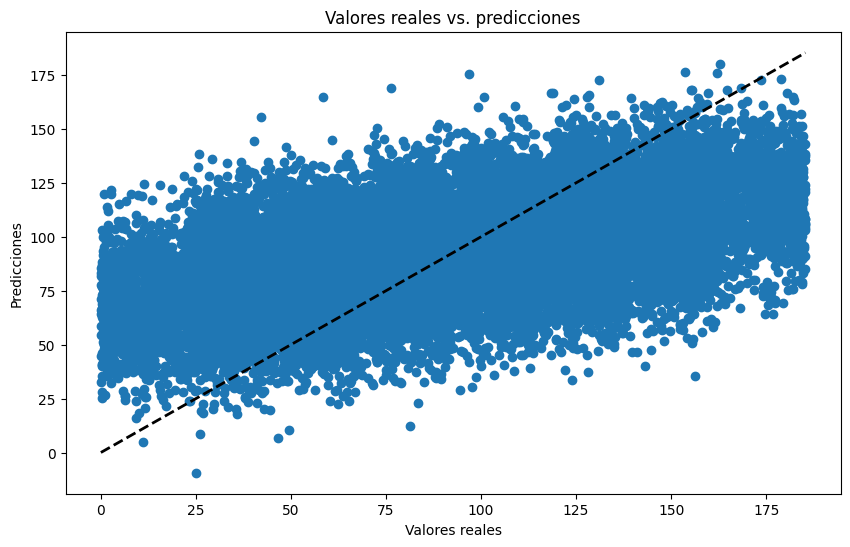

- Region: R1
Train score:0.9996247760326118
Validation score:0.9996233978805127
MAE:0.7187662442124758
MSE:0.7976263360391157
RMSE:0.893099286775617
R2:0.9996233978805127


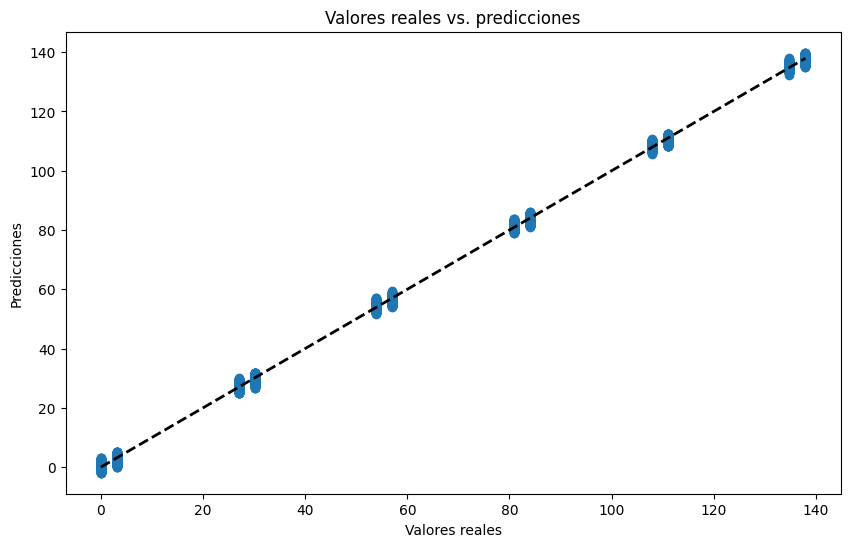

- Region: R2
Train score:0.19661432867329998
Validation score:0.20524758386040443
MAE:32.792652105481814
MSE:1602.3775813236196
RMSE:40.02970873393434
R2:0.20524758386040443


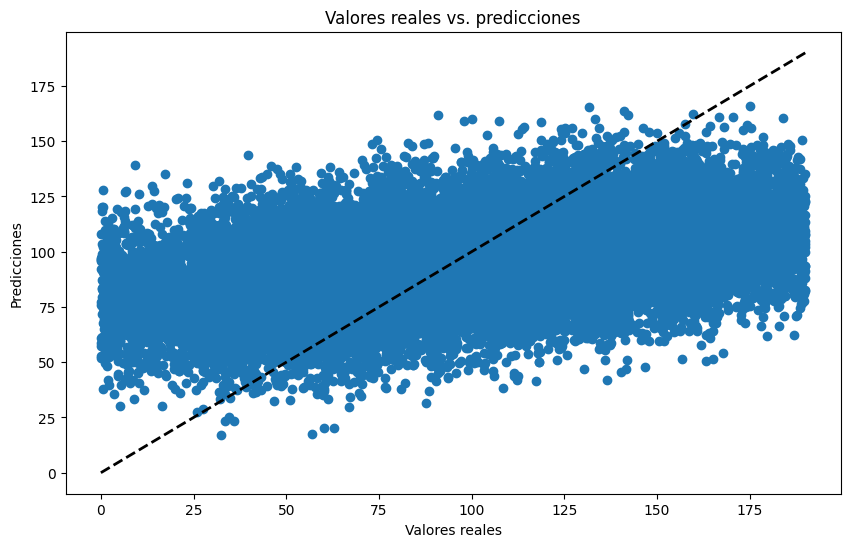

In [63]:
region_results = {}

for region_name in ['R0','R1','R2']:
    regions_filtered = regions[regions['region'] == region_name]

    print(f"- Region: {region_name}")
    
    metrics,predictions,model = model_lr(regions_filtered)

    region_results[region_name] = {
        "metrics": metrics,
        "predictions": predictions,
        "model": model
    }
    

De los resultados obtenidos en esta seccion, **la region 1 es la de mejor comportamiento usando el modelo de regresion linear ya que tanto las diferentes metricas de errores son muy bajas y el porcentaje de precision es muy alto.**<br>
Para el caso de las regiones 0 y 2, se comportan de manera muy similar con este modelo tanto en las metricas de errores como en el porcentaje de precision. En ambas regiones, los errores son muy altos y la precisiones muy bajas.

# 4. Calculo de ganancias

En esta seccion se cargaran las valores necesarios en variables para el calculo de ganancias en cada region. 

In [64]:
# Creacion de variables
invest = 100000000 #USD
cost_per_thousand_barrels = 4500 #USD por 1000 unidades de producto
cost_per_field = 500000 #USD por pozo


In [65]:
# Obtener los pozos a tener dada la inversion 
fields_qty = invest/cost_per_field
print(f'Se pueden comprar {fields_qty} pozos')

# Obtener las unidades de producto dada la inversion
qty_unit_product_thousand = invest/cost_per_thousand_barrels
print(f'Para cubrir el presupuesto se deben de generar {qty_unit_product_thousand} unidades de producto')

# Obtener la unidad de productos por pozo
unit_product_per_region = qty_unit_product_thousand/fields_qty
print(f'Cada region debe de producir en promedio {unit_product_per_region} unidades de producto')

Se pueden comprar 200.0 pozos
Para cubrir el presupuesto se deben de generar 22222.222222222223 unidades de producto
Cada region debe de producir en promedio 111.11111111111111 unidades de producto


In [66]:
#Obtencion de medias por region y comparandolo con el umbral
for region_name in region_results.keys():
    all_predictions = region_results[region_name]['predictions']
    mean_units_product = all_predictions['pred_target'].mean()
    difference = unit_product_per_region - mean_units_product 
    print(f"La region {region_name} se encuentra por debajo del umbral por las siguientes unidades de producto promedio: {difference:.2f}")

La region R0 se encuentra por debajo del umbral por las siguientes unidades de producto promedio: 18.52
La region R1 se encuentra por debajo del umbral por las siguientes unidades de producto promedio: 42.38
La region R2 se encuentra por debajo del umbral por las siguientes unidades de producto promedio: 16.15


En esta seccion se obtuvo la unidad media de productos necesarias para evitar perdidas y se comparo con la media de cada region, dando como resultados que todas las regiones estan por debajo del umbral. Las regiones 0 y 2 son las mas cercanas al umbral de 111.1 unidades de producto pero **la region 2 es la mas cercana y la ganadora en ese aspecto.**<br>
En la siguiente seccion se analizaran el top 200 de cada region para poder determinar si considerando unicamente esos pozos se pueden obtener ganancias. 

# 5. Funcion para calculo de ganancias y predicciones

En esta seccion primero se analizaran los datasets de cada region para verificar que se encuentren filtrados por los mejores 200 y ordenados por las predicciones, posteriormente se generara una funcion para calcular las ganancias para cada region.

In [67]:
#Verificacion de dataset de predicciones para region 0
top_200_R0 = region_results['R0']['predictions'].sort_values(by='pred_target',ascending=False).head(200)
print(top_200_R0)
print()
print(top_200_R0['pred_target'].mean())

       target_valid  pred_target
93073    162.810993   180.180713
46784    153.639837   176.252213
78948    162.153488   175.850623
43388     96.893581   175.658429
6496     178.879516   173.299686
...             ...          ...
30488    179.683422   148.507064
98799     95.396917   148.481767
53840    160.361464   148.476498
4638     102.186603   148.436761
75908    119.890261   148.365941

[200 rows x 2 columns]

155.511654194057


In [68]:
#Verificacion de dataset de predicciones para region 1
top_200_R1 = region_results['R1']['predictions'].sort_values(by='pred_target',ascending=False).head(200)
print(top_200_R1)
print()
print(top_200_R1['pred_target'].mean())

        target_valid  pred_target
138665    137.945408   139.818970
120191    137.945408   139.773423
114041    137.945408   139.703330
124274    137.945408   139.560938
192782    137.945408   139.516754
...              ...          ...
113370    137.945408   138.421423
145823    137.945408   138.416960
186987    137.945408   138.413881
172313    137.945408   138.412834
159892    137.945408   138.410697

[200 rows x 2 columns]

138.73013391081716


In [69]:
#Verificacion de dataset de predicciones para region 2
top_200_R2 = region_results['R0']['predictions'].sort_values(by='pred_target',ascending=False).head(200)
print(top_200_R2)
print()
print(top_200_R2['pred_target'].mean())

       target_valid  pred_target
93073    162.810993   180.180713
46784    153.639837   176.252213
78948    162.153488   175.850623
43388     96.893581   175.658429
6496     178.879516   173.299686
...             ...          ...
30488    179.683422   148.507064
98799     95.396917   148.481767
53840    160.361464   148.476498
4638     102.186603   148.436761
75908    119.890261   148.365941

[200 rows x 2 columns]

155.511654194057


In [70]:
#Funcion para para calcular el beneficio del top 200 de pozos de cada region
def profit_calculation(region_name,cost_per_thousand_barrels,invest):
    top_200 = region_results[region_name]['predictions'].sort_values(by='pred_target',ascending=False).head(200)
    pred_profit = cost_per_thousand_barrels * top_200['target_valid'].sum() - invest
    return pred_profit

In [71]:
#Calculo de beneficio esperado por region
for region_name in region_results.keys():
    profit = profit_calculation(region_name,cost_per_thousand_barrels,invest)
    print(f'La region {region_name} tiene un beneficio esperado de {profit:.2f} USD')

La region R0 tiene un beneficio esperado de 33208260.43 USD
La region R1 tiene un beneficio esperado de 24150866.97 USD
La region R2 tiene un beneficio esperado de 27103499.64 USD


Despues de obtener unicamente el top de 200 pozos por region y calcular la ganancia, se detecto que **la region 0 es de la que se obtiene el mayor beneficio**. Para las otras dos regiones el beneficio es muy similar pero esta por debajo del de la region 0. 

# 6. Calculo de riesgos y ganancias por region

En esta seccion se calculara la ganancia y riesgos pero utilizando la estrategia de bootstrap con una muestras de 1000. Se utilizara una funcion para poder obtener rapidamente los resultados.

In [72]:
#Funcion para calcular riesgos y ganancias por medio de bootstrap
def bootstrap_sample(predic_df,invest,cost_per_thousand_barrels,n_inter=1000,k=200):

    n = len(predic_df)
    profits = []

    for i in range(n_inter):
        #Generacion de data set de muestras
        muestra = predic_df.sample(n=n,replace=True)

        #Ordenar por mayor prediccion
        topk = muestra.sort_values('pred_target',ascending=False).head(k)

        #Calculo de ganancia con valores reales
        gain = topk['target_valid'].sum() * cost_per_thousand_barrels - invest
        profits.append(gain)

    mean_gain = np.mean(profits)
    ci_low, ci_high = np.percentile(profits,[2.5,97.5])
    risk_loss = (np.array(profits) < 0).mean() *100

    return mean_gain, ci_low, ci_high, risk_loss

In [73]:
#Calculo y despliegue de resultados de cada region
for region in region_results.keys():
    preds = region_results[region]['predictions']
    mean_gain,ci_low,ci_high,risk = bootstrap_sample(preds,invest,cost_per_thousand_barrels)

    print(f'- Region: {region}')
    print(f'Beneficio promedio: {mean_gain:.0f} USD')
    print(f'IC(95%): [{ci_low:.0f},{ci_high:.0f}]')
    print(f'Riesgo de perdida: {risk:.2f}%')
    print()

- Region: R0
Beneficio promedio: 33276317 USD
IC(95%): [30081782,36446289]
Riesgo de perdida: 0.00%

- Region: R1
Beneficio promedio: 24150867 USD
IC(95%): [24150867,24150867]
Riesgo de perdida: 0.00%

- Region: R2
Beneficio promedio: 27134791 USD
IC(95%): [23844733,30801278]
Riesgo de perdida: 0.00%



Despues de utilizar la estrategia de boostrap para 1000 muestras, se observo que **la region de la cual se obtendran mayores ingresos o beneficios es la region 0.** Esta eleccion coincide con el analisis anterior. 

# 7. Conclusiones

Los resultados obtenidos en cada seccion de este proyecto son las siguientes:
1. Para el analisis del **modelo de prediccion de regresion linear, el mejor fue el de la region 1.**
2. Para el calculo de **ganancias usando el umbral de unidades de producto, el mejor fue el de la region 2.**
3. Para el **beneficio esperado utilizando los mejores 200 pozos por region, el mejor fue el de la region 0.**
4. Para el **beneficio esperado utilizando la estrategia de bootstrap con 1000 muestras y seleccionando los mejores 200 pozos, el mejor fue la region 0.**

Dicho lo anterior, la region recomendada para invertir es la region 0. 
